#  Impution the value with Mean and Median 

### Imputation-
Imputation means filling missing values (NaN) in a dataset with some estimated value instead of removing the data.
Machine learning models cannot handle missing values,so we fill them using imputation methods.

### Mean Imputation
-Mean imputation replaces the missing values in a column
 with the mean (average) of the available values in that column.

### Median impution 
-Median imputation replaces the missing values in a column
 with the median (middle value) of the available data.
 It is less affected by outliers compared to mean.

In [1]:
import pandas as pd 
import numpy as np
import sklearn as sns 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [122]:
df=pd.read_csv('titanic_toy.csv')

In [123]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [39]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [40]:
X=df.drop(columns=['Survived'])
y=df['Survived']

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [42]:
X_train.shape

(712, 3)

In [43]:
X_train.isnull().mean()

Age       0.196629
Fare      0.050562
Family    0.000000
dtype: float64

In [44]:
mean_age= X_train['Age'].mean()
median_age= X_train['Age'].median()

In [45]:
mean_fare=X_train['Fare'].mean()
median_fare=X_train['Fare'].median()

In [46]:
X_train['Age_median']=X_train['Age'].fillna(median_age)
X_train['Age_mean']=X_train['Age'].fillna(mean_age)

In [47]:
X_train['Fare_median']=X_train['Fare'].fillna(median_age)
X_train['Fare_mean']=X_train['Fare'].fillna(mean_age)

In [48]:
X_train.sample(10)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
438,64.0,263.0000,5,64.0,64.000000,263.0000,263.000000
516,34.0,10.5000,0,34.0,34.000000,10.5000,10.500000
733,23.0,13.0000,0,23.0,23.000000,13.0000,13.000000
371,18.0,6.4958,1,18.0,18.000000,6.4958,6.495800
2,26.0,7.9250,0,26.0,26.000000,7.9250,7.925000
40,40.0,NaN,1,40.0,40.000000,28.0000,29.498846
800,34.0,13.0000,0,34.0,34.000000,13.0000,13.000000
758,34.0,8.0500,0,34.0,34.000000,8.0500,8.050000
88,23.0,263.0000,5,23.0,23.000000,263.0000,263.000000
415,NaN,8.0500,0,28.0,29.498846,8.0500,8.050000


In [49]:
print('original Age variable variance:',X_train['Age'].var())
print('Age variable variance After median impute:',X_train['Age_median'].var())
print('Age variable variance After mean impute:',X_train['Age_mean'].var())

original Age variable variance: 210.2517072477438
Age variable variance After median impute: 169.20731007048096
Age variable variance After mean impute: 168.8519336687225


In [50]:
print('original fare variable variance:',X_train['Fare'].var())
print('fare variable variance After median impute:',X_train['Fare_median'].var())
print('fare variable variance After mean impute:',X_train['Fare_mean'].var())

original fare variable variance: 2761.031434948639
fare variable variance After median impute: 2622.2135607276828
fare variable variance After mean impute: 2621.6705110298403


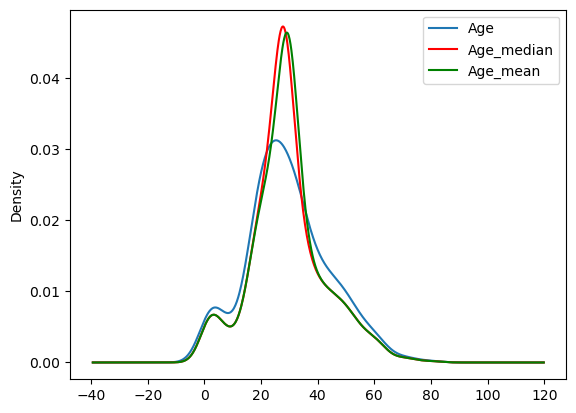

In [51]:
fig=plt.figure()
ax=fig.add_subplot(111)
# original Variable Distribution 
X_train['Age'].plot(kind='kde',ax=ax)
# variable impute with the median
X_train['Age_median'].plot(kind='kde',ax=ax,color='red')

# variable impute with the mean
X_train['Age_mean'].plot(kind='kde',ax=ax,color='green')

# add legends 
lines,lables=ax.get_legend_handles_labels()
ax.legend(lines,lables)
plt.show()

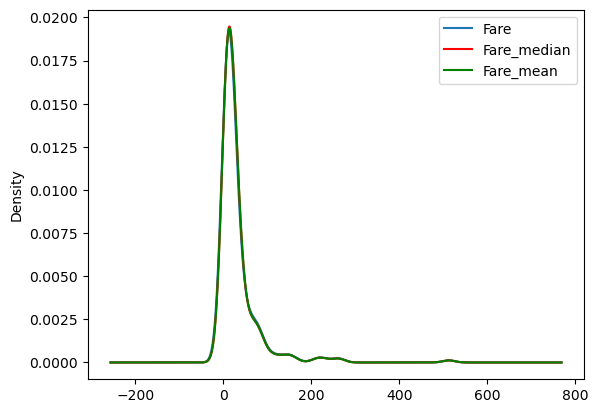

In [52]:
fig=plt.figure()
ax=fig.add_subplot(111)
# original Variable Distribution 
X_train['Fare'].plot(kind='kde',ax=ax)
# variable impute with the median
X_train['Fare_median'].plot(kind='kde',ax=ax,color='red')

# variable impute with the mean
X_train['Fare_mean'].plot(kind='kde',ax=ax,color='green')

# add legends 
lines,lables=ax.get_legend_handles_labels()
ax.legend(lines,lables)
plt.show()

In [53]:
X_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.088561,0.088692
Fare,0.091482,1.000000,0.207193,0.093496,0.088151,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.255307,-0.256883,0.204985,0.204992
Age_median,1.000000,0.093496,-0.255307,1.000000,0.998949,0.090764,0.090894
Age_mean,1.000000,0.088151,-0.256883,0.998949,1.000000,0.085591,0.085711
Fare_median,0.088561,1.000000,0.204985,0.090764,0.085591,1.000000,0.999979
Fare_mean,0.088692,1.000000,0.204992,0.090894,0.085711,0.999979,1.000000


<Axes: >

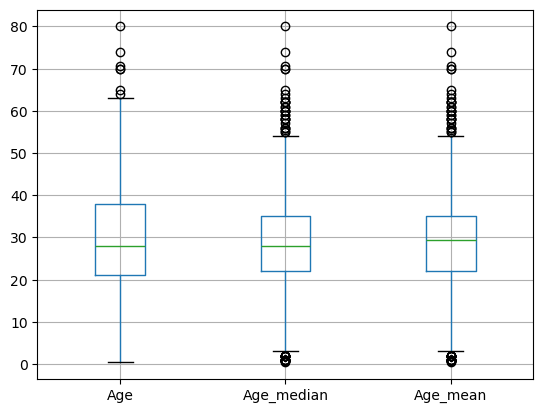

In [54]:
X_train[['Age','Age_median','Age_mean']].boxplot()

<Axes: >

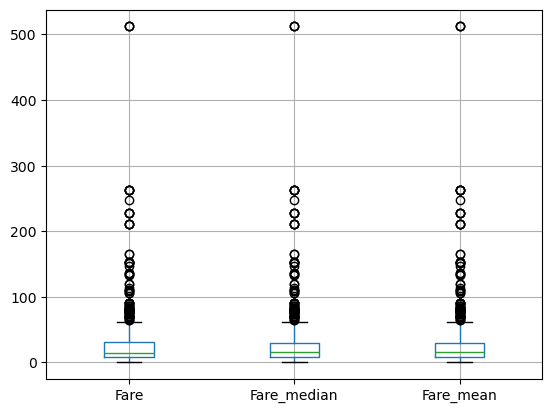

In [55]:
X_train[['Fare','Fare_median','Fare_mean']].boxplot()

# using Sklearn (Simpleimputer)

In [92]:
imputer1=SimpleImputer(strategy='median')
imputer2=SimpleImputer(strategy='mean')

In [106]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [93]:
trf=ColumnTransformer([('imputer1',imputer1,['Age']),
                      ('imputer2',imputer2,['Fare']),],remainder='passthrough')

In [97]:
trf.fit(X_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [107]:
X_train=pd.DataFrame(X_train,columns=X_train.columns)
X_test=pd.DataFrame(X_test,columns=X_test.columns)

In [99]:
trf.named_transformers_['imputer1'].statistics_

array([28.])

In [67]:
trf.named_transformers_['imputer2'].statistics_

array([32.51778772])

In [116]:
X_train_transform=trf.transform(X_train)

In [117]:
X_test_transform=trf.transform(X_test)

In [120]:
X_train

,Age,Fare,Family
331,45.5,28.5000,0
733,23.0,13.0000,0
382,32.0,7.9250,0
704,26.0,7.8542,1
813,6.0,31.2750,6
...,...,...,...
106,21.0,7.6500,0
270,NaN,31.0000,0
860,41.0,NaN,2
435,14.0,120.0000,3


In [119]:
X_train

,Age,Fare,Family
331,45.5,28.5000,0
733,23.0,13.0000,0
382,32.0,7.9250,0
704,26.0,7.8542,1
813,6.0,31.2750,6
...,...,...,...
106,21.0,7.6500,0
270,NaN,31.0000,0
860,41.0,NaN,2
435,14.0,120.0000,3


In [114]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
